In [1]:
%matplotlib inline
import numpy as np
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = Image.open('lena.jpg')

In [8]:
img_gray = img.convert('L')

In [4]:
img.size

(1960, 1960)

In [6]:
img_array = np.array(img_gray)

In [7]:
img_array

array([[114, 114, 114, ...,  35,  33,  35],
       [114, 114, 115, ...,  36,  32,  34],
       [114, 115, 115, ...,  37,  35,  38],
       ...,
       [ 35,  34,  34, ...,  84,  82,  81],
       [ 37,  35,  34, ...,  84,  83,  83],
       [ 41,  37,  35, ...,  82,  84,  86]], dtype=uint8)

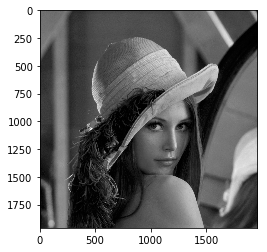

In [11]:
plt.imshow(img_array, cmap='gray')

In [12]:
img_array.shape

(1960, 1960)

# 原本的img_array type 為 integer = 8 bit, 在乘上sobelx, sobely 之後會overflow, 因此可以改成 float32bit 或是 float64 bit(較保險）即可以避免overflow

In [33]:
img_array = img_array.astype('float32')

In [13]:
sobelx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype = np.float)

In [14]:
sobelx

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]])

In [15]:
sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)

In [16]:
sobely

array([[ 1.,  2.,  1.],
       [ 0.,  0.,  0.],
       [-1., -2., -1.]])

In [34]:
outx = ndimage.convolve(img_array, sobelx).astype('float')

In [35]:
outx

array([[  0.,   1.,   0., ...,   7.,  -2.,   8.],
       [  1.,   3.,  -1., ...,   6.,  -3.,   9.],
       [  3.,   4.,  -4., ...,   6.,   1.,   9.],
       ...,
       [ -6.,  -7.,   2., ...,  -5., -10.,  -4.],
       [ -9., -13.,   1., ...,  -4.,  -1.,   1.],
       [-14., -21.,  -2., ...,   4.,  11.,   6.]])

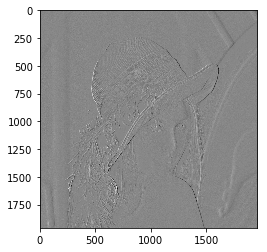

In [36]:
plt.imshow(outx, cmap='gray');

In [37]:
outy = ndimage.convolve(img_array, sobely).astype('float')

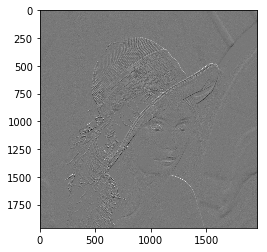

In [38]:
plt.imshow(outy, cmap='gray');

In [39]:
out = np.sqrt(outx*outx+outy*outy)

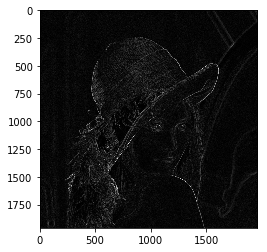

In [40]:
plt.imshow(out, cmap='gray');